<a href="https://colab.research.google.com/github/VS-Lucas/Clustering/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalando bibliotecas:**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from matplotlib.colors import ListedColormap

**Fazendo a leitura da base de dados:**

In [20]:
download_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(download_url)

**Analisando dataset**

In [21]:
df.describe(include = "all")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# **Normalizando os dados e criando o modelo:**

In [22]:
class BuildModel:
  def __init__(self, df):
    self.df = df

  def get_features(self, data):
    return data.iloc[:, 3:5]
    
  def normalize(self):
    data = self.df.values
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)

    return pd.DataFrame(normalized_data)


dbscan = BuildModel(df)
normalized_data = dbscan.normalize()
features = dbscan.get_features(data=normalized_data)

# Gerando o plot e criando os clusters

O algoritmo começa escolhendo um ponto aleatório e, em seguida, expande a partir desse ponto, adicionando pontos que estão a uma distância menor que um valor de epsilon. O algoritmo então encontra todos os pontos dentro da vizinhança de epsilon e expande o cluster, repetindo o processo até que não haja mais pontos dentro da vizinhança de epsilon. Se um ponto não puder ser adicionado a um cluster existente, ele será marcado como ruído. O DBSCAN é capaz de encontrar clusters com formas arbitrárias e é resistente a ruído.

De posse dessa informações e depois de analisar os dados percebemos que o epsilon precisa ser definido sendo < 0.5 para que seja classificado clusters com mais precisão visto que os dados estão muito agrupado.

**Definindo o epsilon em 0.1 e incrementando em 0.1 percebe-se que 0.2 é um boa distância para determinar os clusters**

****************************************************************************************************


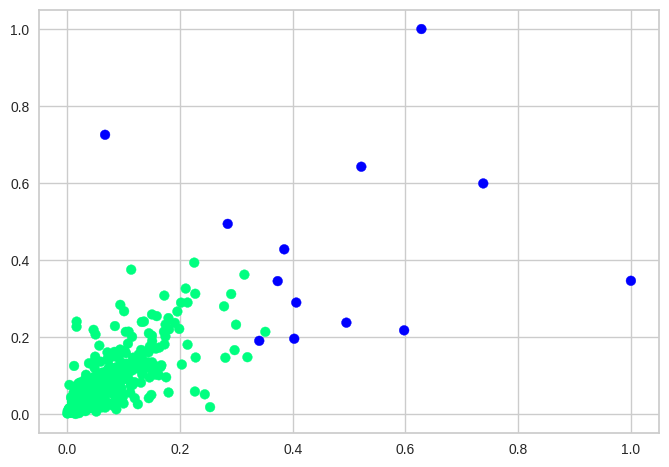

EPSILON = 0.1
****************************************************************************************************
****************************************************************************************************


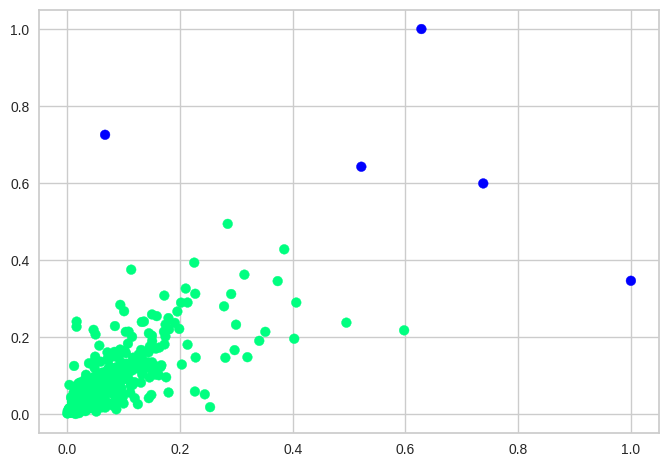

EPSILON = 0.2
****************************************************************************************************
****************************************************************************************************


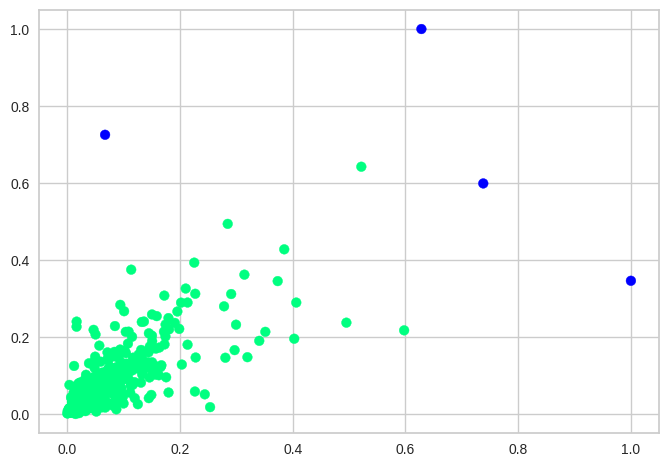

EPSILON = 0.30000000000000004
****************************************************************************************************
****************************************************************************************************


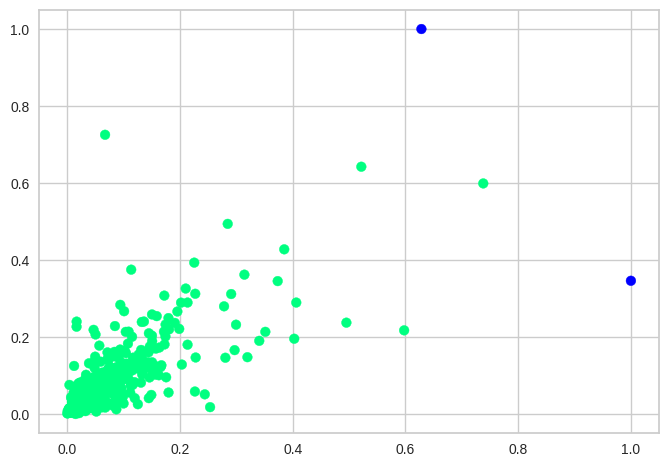

EPSILON = 0.4
****************************************************************************************************


In [24]:

def generate_plot(_data, _labels):
  fig, ax = plt.subplots()

  ax.scatter(_data[3], _data[4], c=_labels, cmap="winter")

  plt.show()

  return
dist = 0.1
for clusters in range(1, 5):
  print('*'*100)
  clustering = DBSCAN(eps=dist, min_samples=10).fit(features)
  cluster_labels = clustering.fit_predict(features)
  
  generate_plot(_data=features, _labels=cluster_labels) 
  print(f'EPSILON = {dist}')
  print('*'*100)
  dist += 0.1